In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Loading dataset

In [2]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target

In [3]:
df = pd.DataFrame(data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['species'] = labels

# Feature Selection

In [4]:
data = df.iloc[:, 0:4]

## 1. Missing Value

📘 Take a look at data, does data have any missing value? How we can handle them?

In [5]:
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

There no missing value :> Good

## 2. Variance

In [6]:
data.shape

(150, 4)

data has 150 instances, 4 atrributes

We gonna see the Variance for each Attribute, Attribute with very low variance, we can discard 

In [7]:
(data/data.mean(axis=0)).var()

sepal length    0.020082
sepal width     0.020325
petal length    0.220659
petal width     0.403925
dtype: float64

> Column with low variance gain very little information, In practical, I will drop zeros varation attributes

> We can see petal length and petal width give us so much information

## 3. Pairwise Correlation

only 4 attributes so we gonna plot the Pearson Correlation Coeffience Matrix, to see how attribute related to each oher

Variance:
$$ V_X = var(X) = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$

Covariance between 2 variables:
$$ cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) $$

- Correlaton Coefficient(Pearson):
    $$ R_{ij} = \frac{C_{ij}}{\sqrt{C_{ii} C_{jj}}} = \frac{cov(X,Y)}{\sqrt{V(X) V(Y)}}$$

- Spearman (for rank): Where: R is rank, d = R1-R2  
    > Spearman is the Pearson Correlation not for the raw data but the rank of raw data
    $$ r_s =\rho _{\operatorname {R} (X),\operatorname {R} (Y)}={\frac {\operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))}{\sigma _{\operatorname {R} (X)}\sigma _{\operatorname {R} (Y)}}} = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}  $$

In [8]:
# data.T because np.cov expects features as rows
corrcoef = np.corrcoef(data.T)

In [9]:
df[df.columns[:4]].corr(method='pearson')

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


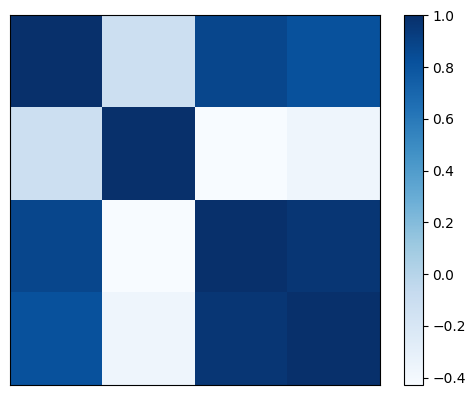

In [10]:
plt.imshow(corrcoef, cmap='Blues', interpolation='nearest')
plt.colorbar()
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
#hide y-axis
ax.get_yaxis().set_visible(False)

> 👌 👌 If two attributes have very high correlation, we can discard one of them with 

petal length and petal width has really high correlation. combine with information that

In [11]:
# calculate absolute correlation coefficients tolerance
tolerance = 0.8
# create a boolean mask
mask = np.abs(corrcoef) > tolerance
# zero out the lower triangle of the mask
mask[np.tril_indices_from(mask)] = False
# find the indices of the remaining features
features = np.where(mask)
# get the feature names
feature_names = df.columns[features[0]]
# print the features
print(feature_names)

Index(['sepal length', 'sepal length', 'petal length'], dtype='object')


In [12]:
# pca = PCA(n_components=4)
# pca.fit(df[df.columns[2:]])
# pca.explained_variance_